In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## 10.4   Lab1: Principal Component Analysis

In [3]:
df = pd.read_csv("USArrests.csv", index_col=0)

In [5]:
states = df.index
print(states)
print(df.columns)
df.head(50)

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')
Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [6]:
print(df.mean(axis=0))
print(df.var(axis=0))

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


In [7]:
pca = PCA(n_components=4)
pca.fit(df)

PCA(n_components=4)

In [9]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 | 

In [8]:
print(pca.mean_)
print(pca.components_) #in sklearn implementation the input is not scaled to be unit std

[  7.788 170.76   65.54   21.232]
[[ 0.04170432  0.99522128  0.04633575  0.0751555 ]
 [ 0.04482166  0.05876003 -0.97685748 -0.20071807]
 [ 0.07989066 -0.06756974 -0.20054629  0.97408059]
 [ 0.99492173 -0.0389383   0.05816914 -0.07232502]]


In [47]:
print(pca.n_components_)
print(pca.n_samples_)

4
50


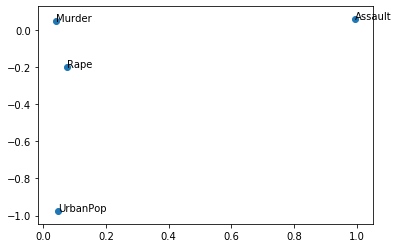

In [8]:
plt.scatter(pca.components_[0], pca.components_[1])
for i,t in enumerate(df.columns):
    plt.text(pca.components_[0,i], pca.components_[1,i], t)
plt.show()

In [9]:
print(pca.explained_variance_) #variance captured
print(pca.explained_variance_ratio_) #variance ratio explained

[7.01111485e+03 2.01992366e+02 4.21126508e+01 6.16424618e+00]
[9.65534221e-01 2.78173366e-02 5.79953492e-03 8.48907879e-04]


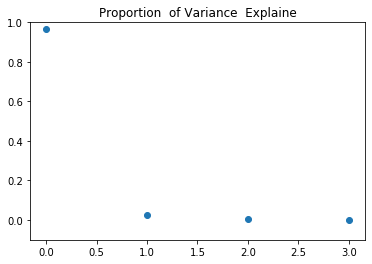

In [10]:
plt.ylim(-.1, 1)
plt.scatter(range(4), pca.explained_variance_ratio_)
plt.title("Proportion  of Variance  Explaine")
plt.show()

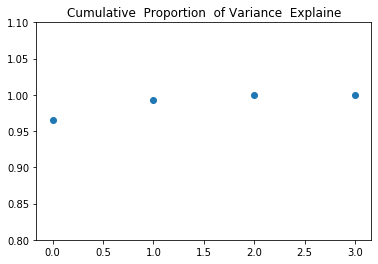

In [11]:
plt.ylim(.8, 1.1)
plt.scatter(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative  Proportion  of Variance  Explaine")
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df)
standardize_pca = PCA(n_components=4)
standardize_pca.fit(scaler.transform(df))
print(standardize_pca.components_) #in sklearn implementation the input is not scaled to be unit std

[-7.10542736e-17  1.38777878e-16 -4.39648318e-16  8.59312621e-16]
[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


## 10.5  Lab 2: Clustering

### 10.5.1 K-Means Clustering

In [20]:
from sklearn.cluster import KMeans

In [23]:
x = np.random.randn(50,2)
x[:25,0] += 3
x[:25,1] -= 4

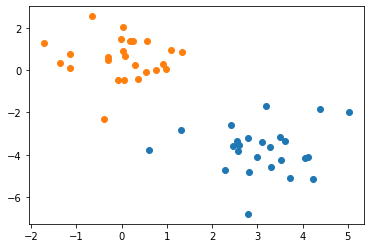

In [24]:
plt.scatter(x[:25,0], x[:25,1])
plt.scatter(x[25:,0], x[25:,1])
plt.show()

In [25]:
kmeans = KMeans(n_clusters=2).fit(x)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


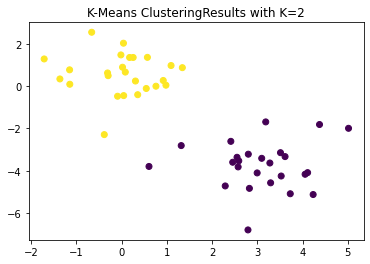

In [26]:
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_)
plt.title("K-Means ClusteringResults with K=2")
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3).fit(x)
print(kmeans.cluster_centers_, '\n')
print(kmeans.labels_, '\n')
print(kmeans.inertia_)

[[ 2.8927759  -3.0504925 ]
 [ 0.01384664  0.56328837]
 [ 3.38615706 -4.77525749]] 

[0 2 2 2 0 0 2 2 2 0 0 0 0 2 2 0 2 0 0 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1] 

70.333302345624


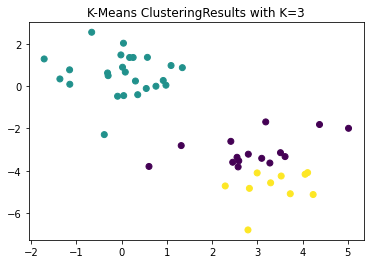

In [28]:
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_)
plt.title("K-Means ClusteringResults with K=3")
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20).fit(x) #better smaller within-group sse
print(kmeans.inertia_)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1).fit(x)
print(kmeans.inertia_)

70.333302345624
75.25100262947826


### 10.5.2  Hierarchical Clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
#from sklearn.metrics.pairwise import euclidean_distances

In [34]:
#x_dist = euclidean_distances(x)
help(hierarchy.linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

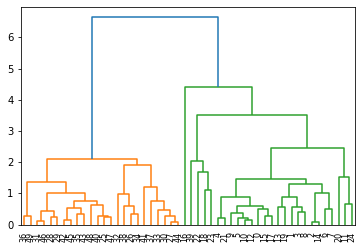

In [38]:
Z = hierarchy.linkage(x, 'weighted')
plt.figure()
dn = hierarchy.dendrogram(Z)
plt.show()

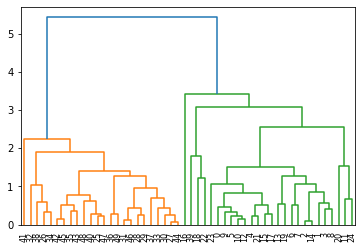

In [39]:
Z = hierarchy.linkage(x, 'average')
plt.figure()
dn = hierarchy.dendrogram(Z)
plt.show()

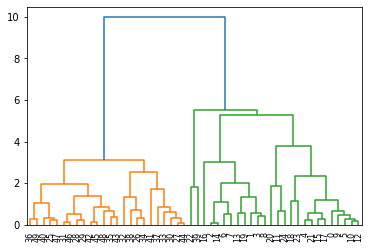

In [42]:
Z = hierarchy.linkage(x, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z)
plt.show()

In [43]:
print(dn['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0']


## 10.6  Lab 3: NCI60 Data Example

In [51]:
df2 = pd.read_csv("NCI60.csv", index_col=0)

In [52]:
labs = df2.iloc[:,-1]
data = df2.iloc[:,:-1]
print(df2.shape)
print(labs)
print(data)

(64, 6831)
V1          CNS
V2          CNS
V3          CNS
V4        RENAL
V5       BREAST
         ...   
V60    MELANOMA
V61    MELANOMA
V62    MELANOMA
V63    MELANOMA
V64    MELANOMA
Name: labs, Length: 64, dtype: object
       data.1    data.2    data.3    data.4    data.5        data.6    data.7  \
V1   0.300000  1.180000  0.550000  1.140000 -0.265000 -7.000000e-02  0.350000   
V2   0.679961  1.289961  0.169961  0.379961  0.464961  5.799610e-01  0.699961   
V3   0.940000 -0.040000 -0.170000 -0.040000 -0.605000  0.000000e+00  0.090000   
V4   0.280000 -0.310000  0.680000 -0.810000  0.625000 -1.387779e-17  0.170000   
V5   0.485000 -0.465000  0.395000  0.905000  0.200000 -5.000000e-03  0.085000   
..        ...       ...       ...       ...       ...           ...       ...   
V60 -0.030000 -0.480000  0.070000 -0.700000 -0.195000  4.100000e-01 -0.240000   
V61 -0.270000  0.630000 -0.100000  1.100000  1.045000  8.000000e-02 -0.090000   
V62  0.210000 -0.620000 -0.150000 -1.330000  0

In [53]:
print(labs[:4])

V1      CNS
V2      CNS
V3      CNS
V4    RENAL
Name: labs, dtype: object


In [54]:
print(labs.value_counts())

NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562B-repro    1
MCF7D-repro    1
MCF7A-repro    1
UNKNOWN        1
K562A-repro    1
Name: labs, dtype: int64


In [77]:
pca = PCA(n_components=5)
pca.fit(data)
print(len(pca.components_[0]))

PCA_NCI=pca.transform(data)
print(PCA_NCI.shape)


6830
(64, 5)
[-19.79578204 -21.54610092 -25.05662155 -37.40953567 -50.21864126
 -26.43520273 -27.3393344  -21.48965804 -20.85249617 -26.9529152
 -24.44669719 -35.07502861 -21.4831609  -25.00473178 -31.74567969
 -24.2373115  -20.50301518 -11.98568262 -24.34422331 -14.30744143
 -11.69611517 -17.55126449 -10.15888453   2.60969345   4.27363832
  -7.00348749   2.17553963 -10.39066948  -4.10558464  -3.10719869
 -13.92013095  -7.34093092  -5.03198327  21.30392046  38.92202004
  46.44106075  48.5138314   41.87871289  56.92268514  50.95932206
  26.03159909  11.8180597   31.65480717  26.33358323  20.56813082
  21.53620179  34.66982695  18.60580279  38.19435245  38.15537113
  30.8931225   21.58584042   3.11073719   9.16049433  14.87891524
   5.27299398  -3.31977167   1.32133953 -11.08727634 -15.44608595
  -1.9254376  -14.35956665 -12.74013603  -8.37781839]


In [59]:
type_list = list(set(labs))
type_id = list(range(len(type_list)))
type_dic = {type_list[i]:i for i in type_id}
color = [type_dic[i] for i in labs]

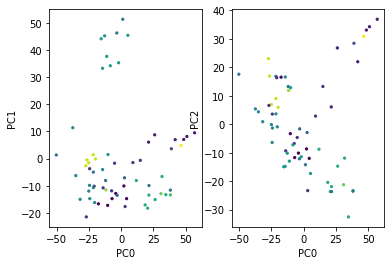

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(PCA_NCI[:,0], PCA_NCI[:,1], c=color, s=5)
ax[0].set_xlabel('PC0')
ax[0].set_ylabel('PC1')
ax[1].scatter(PCA_NCI[:,0], PCA_NCI[:,2], c=color, s=5)
ax[1].set_xlabel('PC0')
ax[1].set_ylabel('PC2')
plt.show()

In [79]:
print(pca.explained_variance_) #variance captured
print(pca.explained_variance_ratio_) #variance ratio explained

[633.2155946  352.9278146  279.91889578 183.08300972 163.55712051]
[0.14892938 0.08300699 0.06583563 0.04306028 0.03846788]


In [81]:

data.shape

(64, 6830)

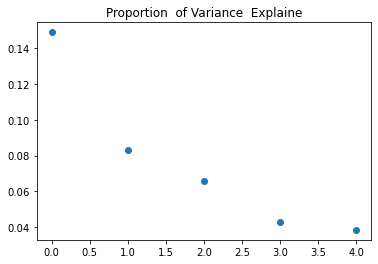

In [82]:
#plt.ylim(-.1, 1)
plt.scatter(range(5), pca.explained_variance_ratio_)
plt.title("Proportion  of Variance  Explaine")
plt.show()

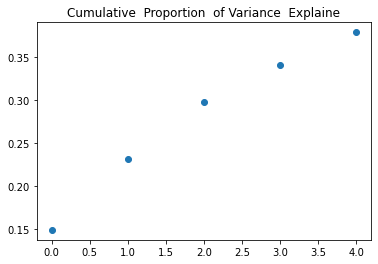

In [83]:
#plt.ylim(.8, 1.1)
plt.scatter(range(5), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative  Proportion  of Variance  Explaine")
plt.show()

## 10.6.2  Clustering the Observations of the NCI60 Data

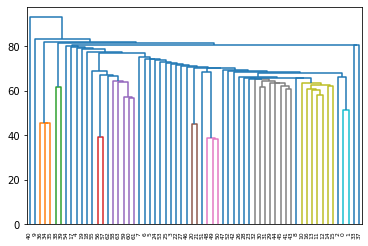

In [84]:
Z = hierarchy.linkage(data, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)
plt.show()

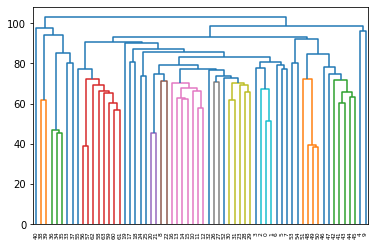

In [85]:
Z = hierarchy.linkage(data, 'average')
plt.figure()
dn = hierarchy.dendrogram(Z)
plt.show()

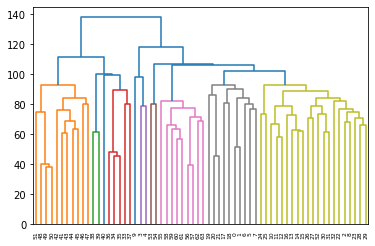

In [86]:
Z = hierarchy.linkage(data, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z)
plt.show()

In [87]:
print(dn['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C3', 'C3', 'C3', 'C3', 'C0', 'C0', 'C0', 'C4', 'C0', 'C5', 'C6', 'C6', 'C6', 'C6', 'C6', 'C6', 'C6', 'C6', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C7', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C8', 'C0', 'C0', 'C0', 'C0', 'C0']


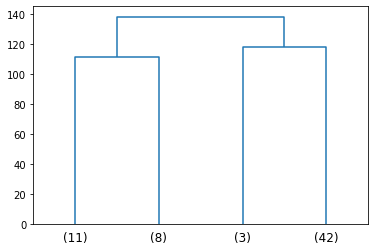

[117, 120, 118, 123]


In [90]:
Z = hierarchy.linkage(data, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z, p=4, truncate_mode='lastp')
plt.show()
print(dn['leaves'])

In [91]:
kmeans = KMeans(n_clusters=4,  init='k-means++', n_init=20).fit(data)
print(kmeans.cluster_centers_, '\n')
print(kmeans.labels_, '\n')

[[ 0.06499946  0.01527724 -0.02319499 ... -0.0718061  -0.06013943
  -0.36402831]
 [ 0.23        0.23        0.5325     ...  0.505       0.80499988
   1.8475    ]
 [-0.01000217 -0.09000217  0.05110894 ... -0.55666883  0.08444228
   0.37666444]
 [-0.29266796 -0.16266663 -0.2020013  ... -0.16933463  0.43333203
   0.76733073]] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 0 0 0 2 2 2 2 2 2 2 2 2] 



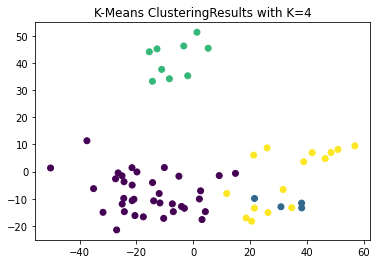

In [93]:
#plt.scatter(pca.components_[0], pca.components_[1], c=kmeans.labels_)
plt.scatter(PCA_NCI[:,0], PCA_NCI[:,1], c=kmeans.labels_)

plt.title("K-Means ClusteringResults with K=4")
plt.show()

In [94]:
kmeans = KMeans(n_clusters=4,  init='k-means++', n_init=20).fit(PCA_NCI)
print(kmeans.cluster_centers_, '\n')
print(kmeans.labels_, '\n')

[[-20.01785033  -7.89659866   5.08403744   0.14269371  -0.25037402]
 [ 19.52933542 -10.28374558 -13.8866293    3.40079324  -0.14641747]
 [ -6.74019546  41.44878876 -12.78430227  -1.45399861  -2.06686827]
 [ 44.23846163   6.99518304  30.35670351  -7.48701457   4.10693563]] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 3 3 3
 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2] 



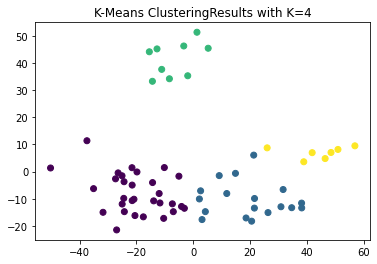

In [95]:
#plt.scatter(pca.components_[0], pca.components_[1], c=kmeans.labels_)
plt.scatter(PCA_NCI[:,0], PCA_NCI[:,1], c=kmeans.labels_)

plt.title("K-Means ClusteringResults with K=4")
plt.show()